# Chapter 4 Analysis of Variance
     

### 4.1.9 Diagnostics of one-way ANOVA

Recall that the (cell means) model for a one-way ANOVA is 
\[
Y_{ij}=\mu_i +\epsilon_{ij}, \  j=1,\ldots, n_i, \ i=1,\ldots,r,
\]
where $\epsilon_{ij}$ are i.i.d. $N(0,\sigma^2)$. 

**Possible departures** from the model assumptions
1. Variances of error terms are unequal.
2. Error terms are not independent.
3. Error terms are not normally distributed.
4. Outliers (samples that do not follow this model).
5. Missing variables. 

All diagnostics rely on the _residuals_.
- Residuals $e_{ij}\equiv Y_{ij}-\bar{Y}_{i\cdot}$.
- Semistudentized residuals $e^*_{ij}=e_{ij}/\sqrt{\rm MSE}$
- Studentized residuals $r_{ij}=e_{ij}/s(e_{ij})$, where $s^2(e_{ij})=(1-1/n_i) {\rm MSE}$. 



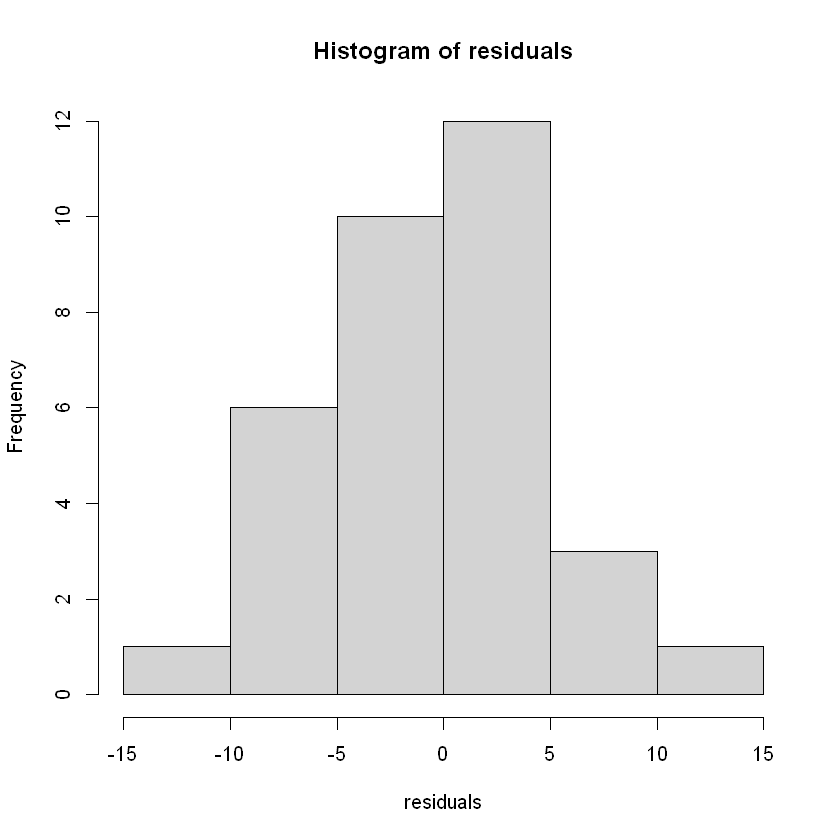

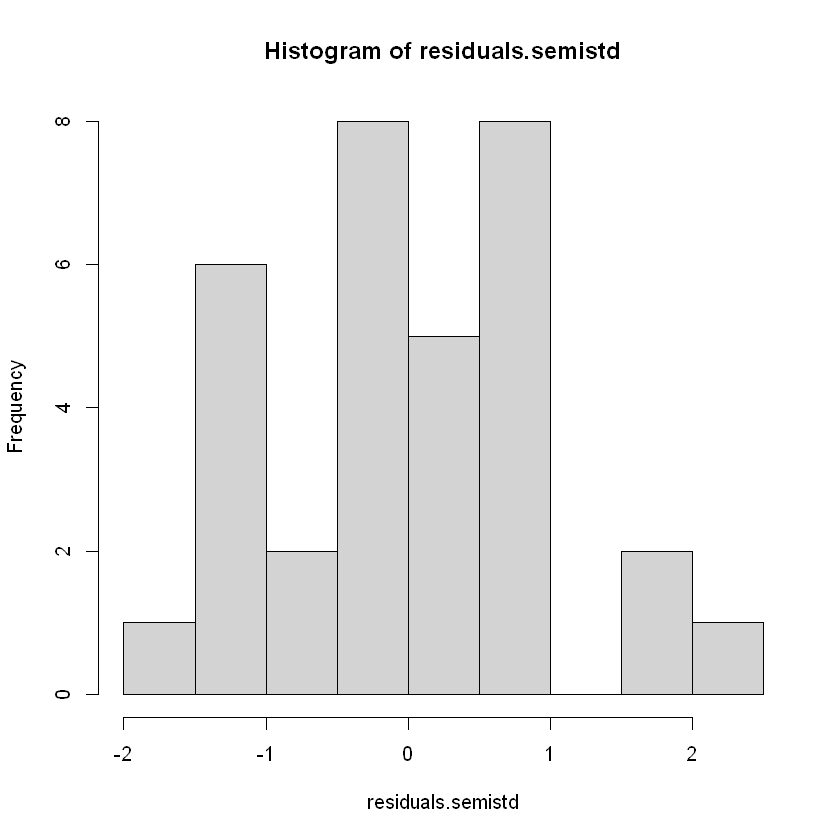

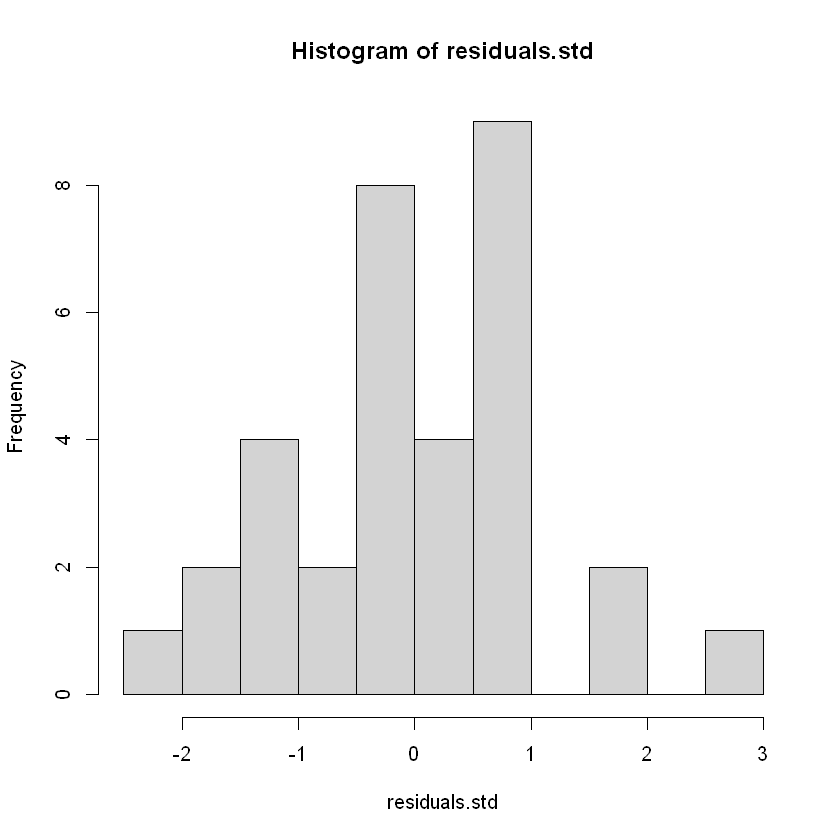

In [18]:
Spock <- read.csv(file="../Data/SpockTrial.csv", header=TRUE, sep=",")
Spock$Judge<-as.factor(Spock$Judge);
anova.fit<- aov(perc.women~Judge,data=Spock)
mse=sum(residuals^2)/anova.fit$df.residual;

# Obtain the residuals from the ANOVA fit
residuals=anova.fit$residuals;
# Semistudentized residuals
residuals.semistd=anova.fit$residuals/sqrt(mse);
# Studentized residuals 
residuals.std=rstudent(anova.fit);

hist(residuals)
hist(residuals.semistd)
hist(residuals.std)

With residuals, we usually begin the diagnostics with visualizations to explore how the residuals are related with other vairbales.

1. $e^*$ or $r$ v.s. $\hat{Y}_{ij}$
2. $e^*$ or $r$ v.s. indices or other structures 
3. Quantile-Quantile plot or stem-leaf plot 
4. $e^*$ or $r$ v.s. missing variables.
5. ...




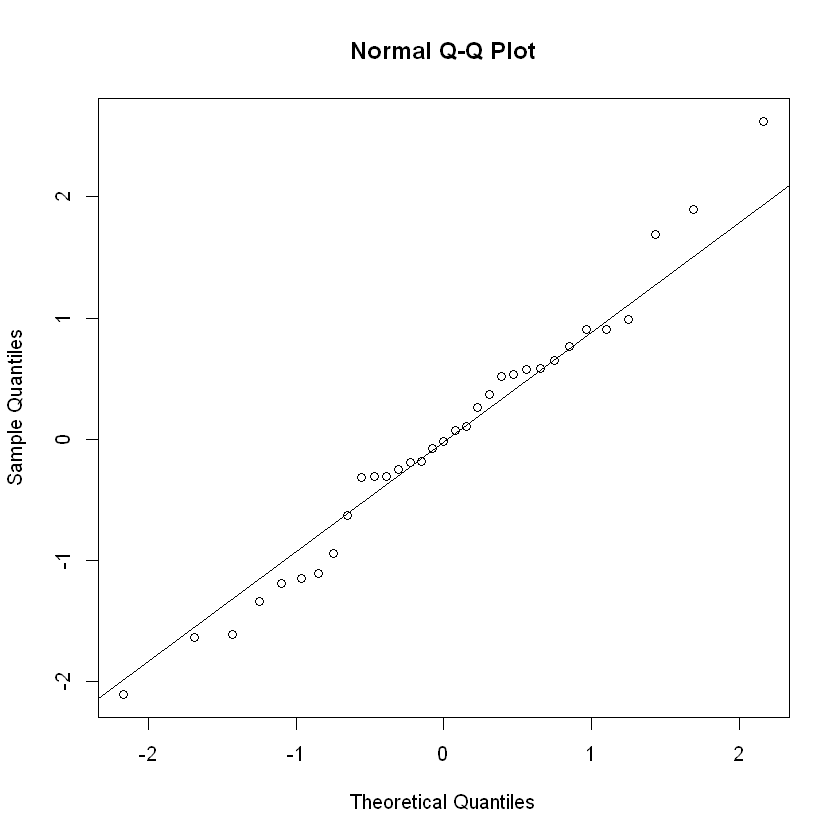

In [25]:
#plot(residuals.std~anova.fit$fitted.values,type='p',pch=16)
#abline(h=0)

#stem(residuals.std)

qqnorm(residuals.std)
qqline(residuals.std)